<a href="https://colab.research.google.com/github/Hariprakashhp/PhonepePulseDataVisualization/blob/main/phonepepulsedatavisualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
!git clone https://github.com/PhonePe/pulse


fatal: destination path 'pulse' already exists and is not an empty directory.


In [28]:
import os
import pandas as pd
import json
import numpy as np
import matplotlib as plt
import seaborn as sns

In [29]:
path_1 = "/content/pulse/data/aggregated/transaction/country/india/state/"
Agg_tran_state_list = os.listdir(path_1)

Agg_tra = {'State': [], 'Year': [], 'Quarter': [], 'Transaction_type': [], 'Transaction_count': [],
           'Transaction_amount': []}

for i in Agg_tran_state_list:
    p_i = path_1 + i + "/"
    Agg_yr = os.listdir(p_i)

    for j in Agg_yr:
        p_j = p_i + j + "/"
        Agg_yr_list = os.listdir(p_j)

        for k in Agg_yr_list:
            p_k = p_j + k
            Data = open(p_k, 'r')
            A = json.load(Data)

            for l in A['data']['transactionData']:
                Name = l['name']
                count = l['paymentInstruments'][0]['count']
                amount = l['paymentInstruments'][0]['amount']
                Agg_tra['State'].append(i)
                Agg_tra['Year'].append(j)
                Agg_tra['Quarter'].append(int(k.strip('.json')))
                Agg_tra['Transaction_type'].append(Name)
                Agg_tra['Transaction_count'].append(count)
                Agg_tra['Transaction_amount'].append(amount)

df_aggregated_transaction = pd.DataFrame(Agg_tra)


In [30]:
path_2 = "/content/pulse/data/aggregated/user/country/india/state/"
Agg_user_state_list = os.listdir(path_2)

Agg_user = {'State': [], 'Year': [], 'Quarter': [], 'Brands': [], 'User_Count': [], 'User_Percentage': []}

for i in Agg_user_state_list:
    p_i = path_2 + i + "/"
    Agg_yr = os.listdir(p_i)

    for j in Agg_yr:
        p_j = p_i + j + "/"
        Agg_yr_list = os.listdir(p_j)

        for k in Agg_yr_list:
            p_k = p_j + k
            Data = open(p_k, 'r')
            B = json.load(Data)

            try:
                for l in B["data"]["usersByDevice"]:
                    brand_name = l["brand"]
                    count_ = l["count"]
                    ALL_percentage = l["percentage"]
                    Agg_user["State"].append(i)
                    Agg_user["Year"].append(j)
                    Agg_user["Quarter"].append(int(k.strip('.json')))
                    Agg_user["Brands"].append(brand_name)
                    Agg_user["User_Count"].append(count_)
                    Agg_user["User_Percentage"].append(ALL_percentage * 100)
            except:
                pass

df_aggregated_user = pd.DataFrame(Agg_user)


In [31]:
path_3 = "/content/pulse/data/map/transaction/hover/country/india/state/"
map_tra_state_list = os.listdir(path_3)

map_tra = {'State': [], 'Year': [], 'Quarter': [], 'District': [], 'Transaction_Count': [], 'Transaction_Amount': []}

for i in map_tra_state_list:
    p_i = path_3 + i + "/"
    Agg_yr = os.listdir(p_i)

    for j in Agg_yr:
        p_j = p_i + j + "/"
        Agg_yr_list = os.listdir(p_j)

        for k in Agg_yr_list:
            p_k = p_j + k
            Data = open(p_k, 'r')
            C = json.load(Data)

            for l in C["data"]["hoverDataList"]:
                District = l["name"]
                count = l["metric"][0]["count"]
                amount = l["metric"][0]["amount"]
                map_tra['State'].append(i)
                map_tra['Year'].append(j)
                map_tra['Quarter'].append(int(k.strip('.json')))
                map_tra["District"].append(District)
                map_tra["Transaction_Count"].append(count)
                map_tra["Transaction_Amount"].append(amount)

df_map_transaction = pd.DataFrame(map_tra)


In [32]:
path_4 = "/content/pulse/data/map/user/hover/country/india/state/"
map_user_state_list = os.listdir(path_4)

map_user = {"State": [], "Year": [], "Quarter": [], "District": [], "Registered_User": []}

for i in map_user_state_list:
    p_i = path_4 + i + "/"
    Agg_yr = os.listdir(p_i)

    for j in Agg_yr:
        p_j = p_i + j + "/"
        Agg_yr_list = os.listdir(p_j)

        for k in Agg_yr_list:
            p_k = p_j + k
            Data = open(p_k, 'r')
            D = json.load(Data)

            for l in D["data"]["hoverData"].items():
                district = l[0]
                registereduser = l[1]["registeredUsers"]
                map_user['State'].append(i)
                map_user['Year'].append(j)
                map_user['Quarter'].append(int(k.strip('.json')))
                map_user["District"].append(district)
                map_user["Registered_User"].append(registereduser)

df_map_user = pd.DataFrame(map_user)


In [33]:
path_5 = "/content/pulse/data/top/transaction/country/india/state/"
top_tra_state_list = os.listdir(path_5)

top_tra = {'State': [], 'Year': [], 'Quarter': [], 'District_Pincode': [], 'Transaction_count': [],
           'Transaction_amount': []}

for i in top_tra_state_list:
    p_i = path_5 + i + "/"
    Agg_yr = os.listdir(p_i)

    for j in Agg_yr:
        p_j = p_i + j + "/"
        Agg_yr_list = os.listdir(p_j)

        for k in Agg_yr_list:
            p_k = p_j + k
            Data = open(p_k, 'r')
            E = json.load(Data)

            for l in E['data']['pincodes']:
                Name = l['entityName']
                count = l['metric']['count']
                amount = l['metric']['amount']
                top_tra['State'].append(i)
                top_tra['Year'].append(j)
                top_tra['Quarter'].append(int(k.strip('.json')))
                top_tra['District_Pincode'].append(Name)
                top_tra['Transaction_count'].append(count)
                top_tra['Transaction_amount'].append(amount)

df_top_transaction = pd.DataFrame(top_tra)


In [34]:
path_6 = "/content/pulse/data/top/user/country/india/state/"
top_user_state_list = os.listdir(path_6)

top_user = {'State': [], 'Year': [], 'Quarter': [], 'District_Pincode': [], 'Registered_User': []}

for i in top_user_state_list:
    p_i = path_6 + i + "/"
    Agg_yr = os.listdir(p_i)

    for j in Agg_yr:
        p_j = p_i + j + "/"
        Agg_yr_list = os.listdir(p_j)

        for k in Agg_yr_list:
            p_k = p_j + k
            Data = open(p_k, 'r')
            F = json.load(Data)

            for l in F['data']['pincodes']:
                Name = l['name']
                registeredUser = l['registeredUsers']
                top_user['State'].append(i)
                top_user['Year'].append(j)
                top_user['Quarter'].append(int(k.strip('.json')))
                top_user['District_Pincode'].append(Name)
                top_user['Registered_User'].append(registeredUser)

df_top_user = pd.DataFrame(top_user)


In [35]:
df_top_user.to_csv('top_user.csv')
df_top_transaction.to_csv('top_transaction.csv')
df_map_user.to_csv('map_user.csv')
df_map_transaction.to_csv('map_transaction.csv')
df_aggregated_user.to_csv('aggregated_user.csv')
df_aggregated_transaction.to_csv('aggregated_transaction.csv')


In [36]:
df_aggregated_transaction = pd.read_csv('aggregated_transaction.csv')
df_aggregated_user = pd.read_csv('aggregated_user.csv')
df_map_transaction = pd.read_csv('map_transaction.csv')
df_map_user = pd.read_csv('map_user.csv')
df_top_transaction = pd.read_csv('top_transaction.csv')
df_top_user = pd.read_csv('top_user.csv')

<ipython-input-42-b6aa5c3d6d46>:36: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  plt.tight_layout()


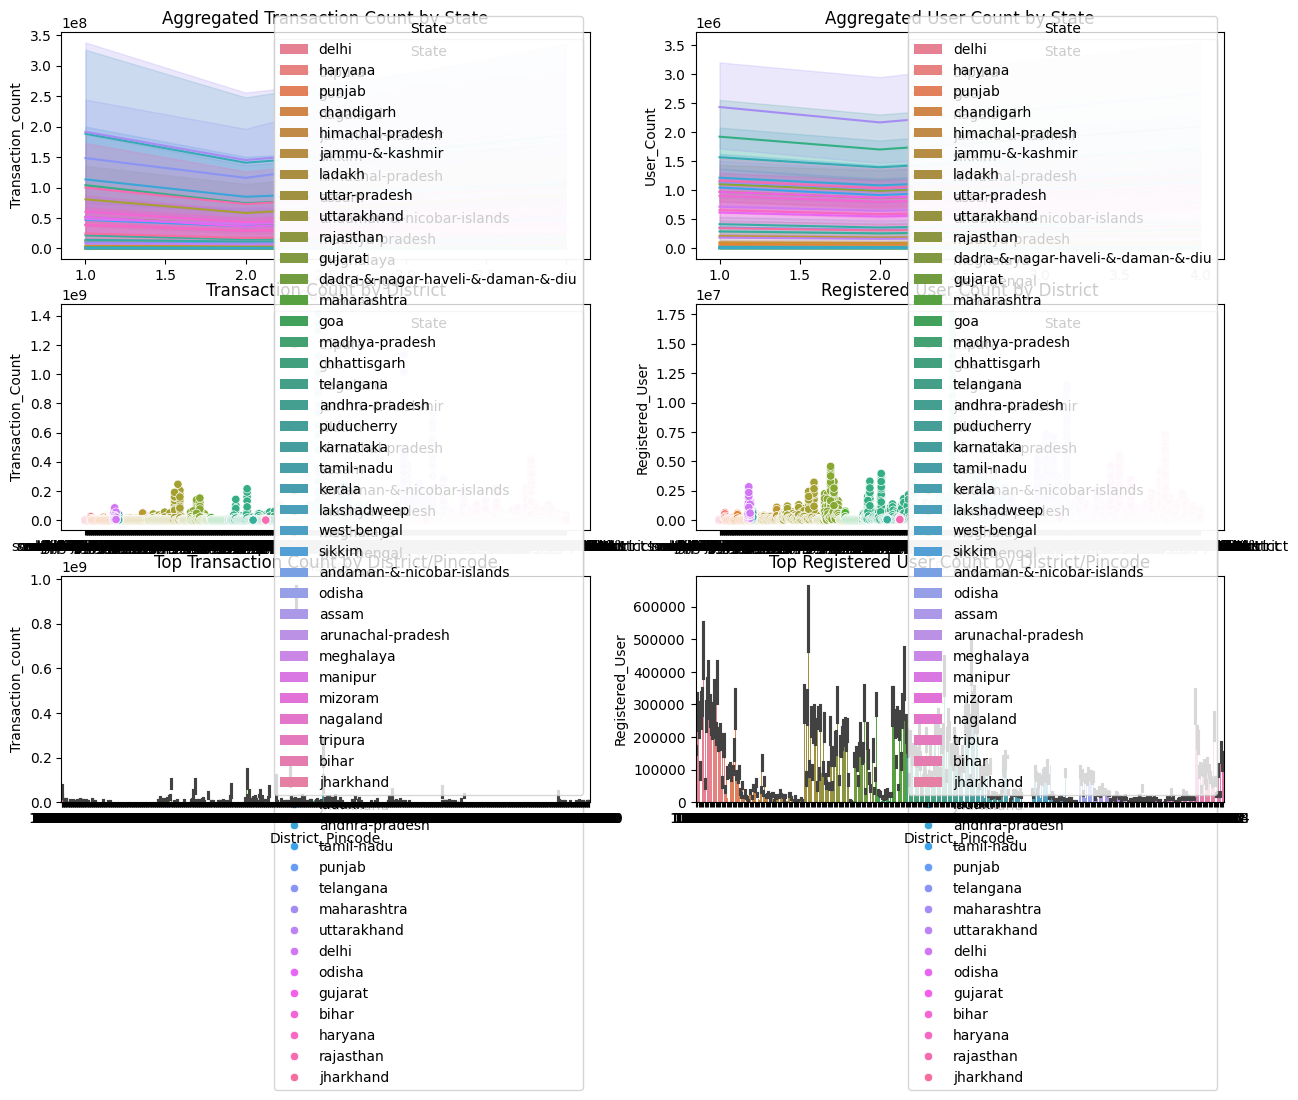

In [42]:



df_aggregated_transaction = pd.read_csv('aggregated_transaction.csv')
df_aggregated_user = pd.read_csv('aggregated_user.csv')
df_map_transaction = pd.read_csv('map_transaction.csv')
df_map_user = pd.read_csv('map_user.csv')
df_top_transaction = pd.read_csv('top_transaction.csv')
df_top_user = pd.read_csv('top_user.csv')


fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 10))


sns.lineplot(data=df_aggregated_transaction, x='Quarter', y='Transaction_count', hue='State', ax=axes[0, 0])
axes[0, 0].set_title('Aggregated Transaction Count by State')


sns.lineplot(data=df_aggregated_user, x='Quarter', y='User_Count', hue='State', ax=axes[0, 1])
axes[0, 1].set_title('Aggregated User Count by State')


sns.scatterplot(data=df_map_transaction, x='District', y='Transaction_Count', hue='State', ax=axes[1, 0])
axes[1, 0].set_title('Transaction Count by District')


sns.scatterplot(data=df_map_user, x='District', y='Registered_User', hue='State', ax=axes[1, 1])
axes[1, 1].set_title('Registered User Count by District')


sns.barplot(data=df_top_transaction, x='District_Pincode', y='Transaction_count', hue='State', ax=axes[2, 0])
axes[2, 0].set_title('Top Transaction Count by District/Pincode')


sns.barplot(data=df_top_user, x='District_Pincode', y='Registered_User', hue='State', ax=axes[2, 1])
axes[2, 1].set_title('Top Registered User Count by District/Pincode')


plt.tight_layout()


plt.show()
